<a href="https://colab.research.google.com/github/andres-gv/python-labs/blob/master/1-Differential_equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1D forced harmonic oscillator with friction**

$(\frac{d^2}{dt^2} - \alpha\frac{d^2}{dt^2} + \omega^2)u(t) = sin(2t)$

Dirichlet coonditions:
u(0)=0; u(10)=1

In [15]:
!pip install findiff

In [78]:
from findiff import FinDiff, PDE, BoundaryConditions, Coef, Identity #,Id
import numpy
from numpy import meshgrid, sin

import operator
import scipy.sparse as sparse
from findiff.coefs import coefficients, coefficients_non_uni

In [80]:
#coefs = findiff.coefficients(deriv=2, acc=2)
shape = (300, )
t = numpy.linspace(0, 10, shape[0])
dt = t[1]-t[0]

L = FinDiff(0, dt, 2) - FinDiff(0, dt, 1) + Coef(5) * Identity()
f = numpy.cos(2*t)

bc = BoundaryConditions(shape)
bc[0] = 0
bc[-1] = 1

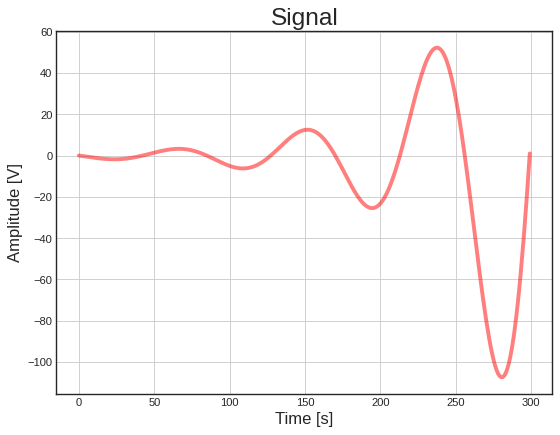

In [105]:
pde = PDE(L, f, bc)
u = pde.solve()
#u
# Create a figure of size 8x6 inches, 80 dots per inch

# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.axis([40, 160, 0, 0.03])

plt.figure(figsize=(8, 6), dpi=80)
plt.xlabel('Time [s]', fontsize = 15)
plt.ylabel('Amplitude [V]', fontsize = 15)
plt.title('Signal', fontsize = 22)
plt.grid(True)
plt.plot(u, c='r', alpha=.5, lw = 3.5)



In [82]:
#from numpy import meshgrid, sin
#X, Y, Z, U = meshgrid(x, y, z, u, indexing="ij")
#diff_op = Coef(2*X) * FinDiff((0, dz, 2), (2, dz, 1)) + Coef(3*sin(Y)*Z**2) * FinDiff((0, dx, 1), (1, dy, 2))

## heat conduction
A plate with temperature profile given on one edge and zero heat flux across the other edges, i.e.

$(\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2}) u(x,y) = f(x,y)$
Dirichlet:

u(x,0) = 300
u(1,y) = 300-200y

Neumann bc:

$\frac{\partial u}{\partial x} = 0$ for $x = 0$

$\frac{\partial u}{\partial y} = 0$ for $y = 0$

In [55]:
import numpy as np
import scipy.sparse as sparse
from scipy.sparse.linalg import spsolve

shape = (100, 100)
x, y = np.linspace(0, 1, shape[0]), np.linspace(0, 1, shape[1])
dx, dy = x[1]-x[0], y[1]-y[0]
X, Y = np.meshgrid(x, y, indexing='ij')

L = FinDiff(0, dx, 2) + FinDiff(1, dy, 2)
f = np.zeros(shape)

bc = BoundaryConditions(shape)
bc[1,:] = FinDiff(0, dx, 1), 0  # Neumann BC
bc[-1,:] = 300. - 200*Y   # Dirichlet BC
bc[:, 0] = 300.   # Dirichlet BC
bc[1:-1, -1] = FinDiff(1, dy, 1), 0  # Neumann BC

In [56]:
pde = PDE(L, f, bc)
u = pde.solve()

In [26]:
u

array([[300.        , 298.97561303, 297.95145385, ..., 234.13193848,
        234.10597872, 234.0973231 ],
       [300.        , 298.97572693, 297.95168165, ..., 234.14058699,
        234.11463138, 234.10597952],
       [300.        , 298.97561303, 297.95145385, ..., 234.13193848,
        234.10597872, 234.09732547],
       ...,
       [300.        , 298.01365302, 296.02731803, ..., 114.02291478,
        113.24365082, 112.98389617],
       [300.        , 297.9967285 , 295.993463  , ..., 109.19044759,
        108.02155671, 107.63192642],
       [300.        , 297.97979798, 295.95959596, ..., 104.04040404,
        102.02020202, 100.        ]])

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

# https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html

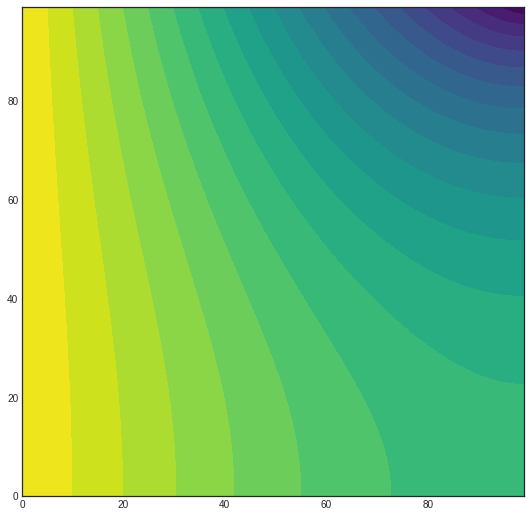

In [72]:
#plt.contourf(u, 100, cmap='RdGy')
#plt.contourf(u, 100, cmap='GnBu_r')
fig, ax = plt.subplots(figsize=(9,9))
ax.contourf(u, 20, cmap='viridis')
plt.show()
#plt.contourf(u, 50, figsize=(9,9),cmap='viridis', )


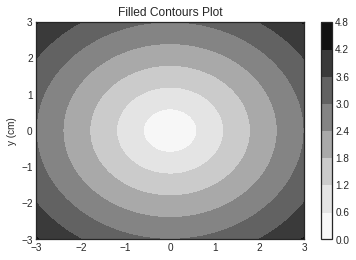

In [42]:
import numpy as np
import matplotlib.pyplot as plt
xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
#ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

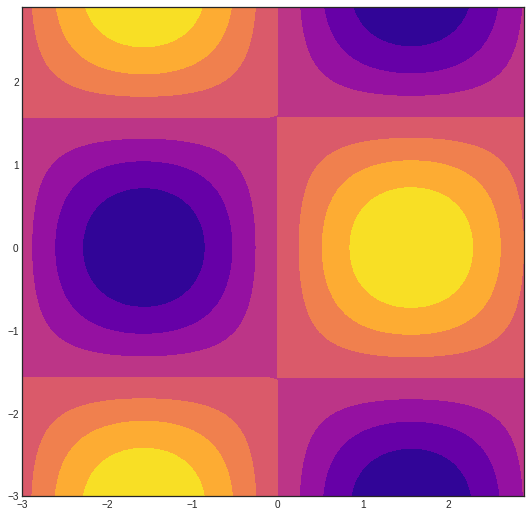

In [53]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline


x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)

X, Y = np.meshgrid(x, y)

Z = np.sin(X)*np.cos(Y)

fig, ax = plt.subplots(figsize=(9,9))

ax.contourf(X,Y,Z, cmap='viridis')

plt.show()


In [64]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

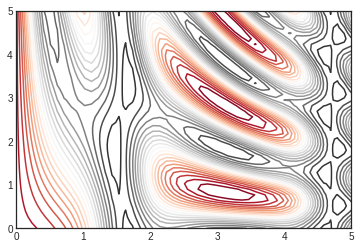

In [65]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

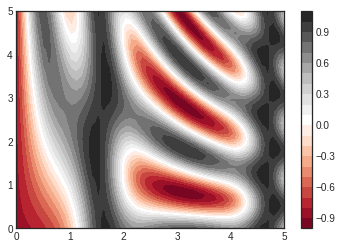

In [66]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

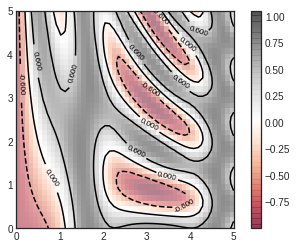

In [67]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();
